In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.datasets import load_digits

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

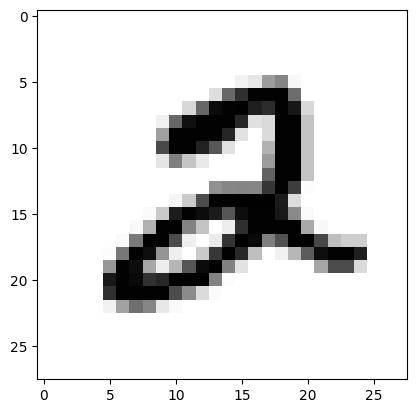

In [ ]:
plt.imshow(x_train[5],cmap=plt.cm.binary)

Checking the values of each pixel before normalising


In [ ]:
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

**Normalisation**

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

Checking the values of each pixel After normalising


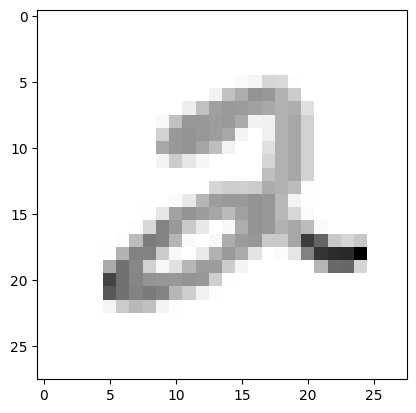

In [ ]:
plt.imshow(x_train[5],cmap=plt.cm.binary)

In [ ]:
print(x_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
Img_size=28
x_train=np.array(x_train).reshape(-1,Img_size,Img_size,1)###increasing one dimension for kernel operation
x_test=np.array(x_test).reshape(-1,Img_size,Img_size,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


In [ ]:
model=Sequential()### initiating model and telling that we are adding layers sequentially

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 87s 46ms/step - loss: 0.2522 - accuracy: 0.9190


In [ ]:
loss,accuracy=model.evaluate(x_test,y_test,epochs=5)
print(loss)
print(accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.1041 - accuracy: 0.9695
0.10411714762449265
0.9695000052452087


In [ ]:
predictions=model.predict([x_test])

313/313 [==============================] - 5s 14ms/step


In [ ]:
print(predictions)

[[1.58782204e-04 1.24088010e-05 6.45095948e-03 ... 9.92006183e-01
  3.34411307e-05 1.21379457e-03]
 [3.74492747e-03 6.96922216e-05 9.96082067e-01 ... 8.15862677e-06
  2.51800448e-05 2.46731247e-07]
 [2.53457310e-05 9.99832869e-01 3.72956765e-06 ... 3.03371526e-05
  8.15361727e-06 8.40463372e-07]
 ...
 [1.08108964e-07 1.62876486e-08 2.62412470e-07 ... 1.53358248e-09
  2.70574196e-06 5.49823337e-04]
 [6.35056151e-03 9.98866744e-06 2.87591592e-06 ... 1.05036088e-06
  8.48876836e-04 1.63436437e-03]
 [2.97627319e-03 1.53537712e-07 4.34299349e-04 ... 1.12804166e-08
  1.03520964e-04 3.61846614e-05]]


In [ ]:
print(np.argmax(predictions[10]))

0


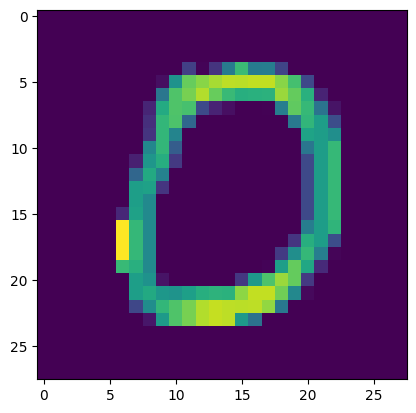

In [ ]:
plt.imshow(x_test[10])

In [ ]:
image=cv2.imread('6_img.jpg')

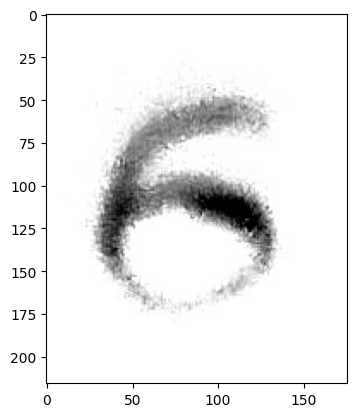

In [ ]:
plt.imshow(image)

In [ ]:
grey_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

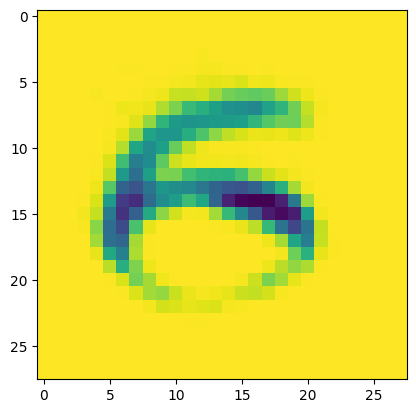

In [ ]:
resized=cv2.resize(grey_img,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(resized)

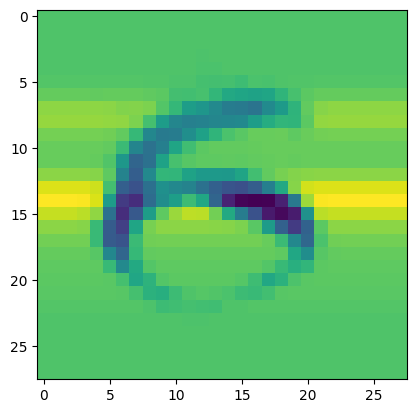

In [ ]:
new_img=tf.keras.utils.normalize(resized,axis=1)
plt.imshow(new_img)

In [ ]:
newimg=np.array(new_img).reshape(-1,Img_size,Img_size,1)

In [ ]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(np.argmax(predictions))

6
